In [1]:
from IPython.display import clear_output
!pip install pyspark
!pip install tqdm

clear_output()

In [2]:
!gdown --id 1Uf_XlW3PW1znFgKwwk_Zvu5nLdkA46vG
# https://drive.google.com/uc?id=1Uf_XlW3PW1znFgKwwk_Zvu5nLdkA46vG

Downloading...
From: https://drive.google.com/uc?id=1Uf_XlW3PW1znFgKwwk_Zvu5nLdkA46vG
To: /content/students_curriculum.csv
100% 208M/208M [00:01<00:00, 106MB/s]


In [3]:
ls

sample_data/  students_curriculum.csv


In [4]:
import pandas as pd

df = pd.read_csv('students_curriculum.csv',encoding='Big5')
df = df[df['DPTCODE'] == 5002]
# df = df[df['IN_YEAR'] >= 2006]
len(set(df['S_ID']))

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (6,9,24,64,69,71,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


2274

In [5]:
df_student = df[df['CRS_NAME'].isin(['離散數學'])]
print('離散數學', len(set(df_student['S_ID'])))

df_student = df[df['CRS_NAME'].isin(['機率與統計'])]
print('機率與統計', len(set(df_student['S_ID'])))
df_student = df[df['CRS_NAME'].isin(['程式語言'])]
print('程式語言', len(set(df_student['S_ID'])))
df_student = df[df['CRS_NAME'].isin(['組合語言與系統程式'])]
print('組合語言與系統程式', len(set(df_student['S_ID'])))
df_student = df[df['CRS_NAME'].isin(['計算機組織'])]
print('計算機組織', len(set(df_student['S_ID'])))

df_student = df[df['CRS_NAME'].isin(['計算機網路'])]
print('計算機網路', len(set(df_student['S_ID'])))
df_student = df[df['CRS_NAME'].isin(['演算法'])]
print('演算法', len(set(df_student['S_ID'])))

df_student = df[df['CRS_NAME'].isin(['作業系統'])]
print('作業系統', len(set(df_student['S_ID'])))
df_student = df[df['CRS_NAME'].isin(['編譯器'])]
print('編譯器', len(set(df_student['S_ID'])))

離散數學 513
機率與統計 463
程式語言 514
組合語言與系統程式 481
計算機組織 514
計算機網路 609
演算法 641
作業系統 632
編譯器 582


## Get data between 2006 and 2014

## filter

In [148]:
import pandas as pd
from tqdm import tqdm

df = pd.read_csv('students_curriculum.csv',encoding='Big5')
courses = ['編譯器']

# df = df[df['IN_YEAR'] >= 2006]
# df = df[2015 >= df['IN_YEAR']]

# 開課編號(5001電機系、5002資工系、5003通訊系)
df = df[df['DPTCODE'] == 5002]

df_student = df[df['CRS_NAME'].isin(courses)]

# 有修過 courses 的學生，還有修過其他的課程
students_id = list(set(df_student['S_ID']))
df = df[df['S_ID'].isin(students_id)]

df

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning:

Columns (6,9,24,64,69,71,85) have mixed types.Specify dtype option on import or set low_memory=False.



S_ID  TERM  ... THOURS  INDUSTRY
6602    00e3685abef26a2677014c666c18b6c4  1011  ...    3.0       0.0
6603    00efdba07cbe047119c5e9204bfe8370  1011  ...    3.0       0.0
6604    02d0a209d5703c64e04e02cf885aa48f  1011  ...    3.0       0.0
6605    04f72f0d4159c3e61f46d2b3c6c969b1  1011  ...    3.0       0.0
6606    057485dbf25ba7d35d93c7ec2f7709c4  1011  ...    3.0       0.0
...                                  ...   ...  ...    ...       ...
611640  00ee163aa93ddad3d3430f904df571d1  1061  ...    3.0       0.0
611645  93bb55b144144c95913f447d999185c2  1061  ...    3.0       0.0
611646  9a6d88129d88a3a6b8021ec6d19f685a  1061  ...    3.0       0.0
611647  9e0356bd20c0cefbc0ed84dbdd275b86  1061  ...    3.0       0.0
611649  dbd9f1c2c3e1199165327f43d1320d90  1061  ...    3.0       0.0

[13396 rows x 90 columns]

In [149]:
df[df['DPTCODE'] == 5002]

S_ID  TERM  ... THOURS  INDUSTRY
6602    00e3685abef26a2677014c666c18b6c4  1011  ...    3.0       0.0
6603    00efdba07cbe047119c5e9204bfe8370  1011  ...    3.0       0.0
6604    02d0a209d5703c64e04e02cf885aa48f  1011  ...    3.0       0.0
6605    04f72f0d4159c3e61f46d2b3c6c969b1  1011  ...    3.0       0.0
6606    057485dbf25ba7d35d93c7ec2f7709c4  1011  ...    3.0       0.0
...                                  ...   ...  ...    ...       ...
611640  00ee163aa93ddad3d3430f904df571d1  1061  ...    3.0       0.0
611645  93bb55b144144c95913f447d999185c2  1061  ...    3.0       0.0
611646  9a6d88129d88a3a6b8021ec6d19f685a  1061  ...    3.0       0.0
611647  9e0356bd20c0cefbc0ed84dbdd275b86  1061  ...    3.0       0.0
611649  dbd9f1c2c3e1199165327f43d1320d90  1061  ...    3.0       0.0

[13396 rows x 90 columns]

In [150]:
set( list(df['CRS_NAME']) )

{'3D計算機圖學',
 '3D電腦動畫與遊戲技術',
 'Linux作業系統',
 'SDN 軟體定義網路與網路管理',
 'Web Apps的軟體工程與實作',
 'Web技術與實作',
 '互動式電腦繪圖及遊戲設計',
 '人工智慧',
 '人機互動設計、原型與評估',
 '作業系統',
 '使用者界面設計和評鑑',
 '分散式計算演算法',
 '創造力輔具工具',
 '同儕網路',
 '圖形識別',
 '多媒體軟硬體整合設計',
 '寬頻無線網路之介紹',
 '專題實驗 I',
 '專題實驗II',
 '嵌入式系統設計',
 '嵌入式視覺',
 '工業電腦虛擬機技術',
 '工程數學',
 '巨量資料探勘',
 '影像處理',
 '感測器應用電路',
 '應用密碼學',
 '敏捷方法',
 '教學助理教學實務課程',
 '數位系統實驗',
 '數位系統導論',
 '數位隨身裝置程式設計',
 '數位隨身裝置程式設計專題',
 '智慧型代理人軟體工程',
 '智慧型監控系統與實驗',
 '智慧型科技專利研討專題',
 '智慧型語言學習系統',
 '最佳化理論',
 '機器人設計',
 '機器學習',
 '機率與統計',
 '演算法',
 '無線多媒體系統',
 '無線通訊與網路',
 '物件導向分析與設計',
 '物聯網',
 '生物與醫學資訊之資訊探勘',
 '社群媒體探勘',
 '科技溝通與表達',
 '程式設計研討專題',
 '程式語言',
 '程式語言設計',
 '程式語言設計概論',
 '穿戴式系統設計',
 '組合語言與系統程式',
 '網路概論與實務',
 '線性代數',
 '編譯器',
 '自然語言處理',
 '虛擬化技術與應用',
 '虛擬實境',
 '行動應用服務產品設計實作',
 '計算型智慧',
 '計算幾何',
 '計算機實習 Ⅱ',
 '計算機實習Ⅰ',
 '計算機概論 Ⅰ',
 '計算機概論 Ⅱ',
 '計算機組織',
 '計算機結構',
 '計算機網路',
 '計算理論Ⅰ',
 '認知語音訊號處理',
 '貝氏資料分析介紹',
 '資料倉儲系統與知識庫',
 '資料壓縮',
 '資料庫系統',
 '資料探勘',
 '資料科學導論',
 '資料結構',
 '資料萃取與檢索',
 '資訊安全概論',
 '資訊工程概論',
 '資訊與

In [151]:
import plotly.express as px
# 圖應該要是histogram而不是bar
fig = px.histogram(df, x="SCORE")
fig.show()

In [152]:
import numpy as np
import math
# bound_score: 25~100% 成績相對還不錯 (換句話說0~25% 成績相對不好)
# courseID_with_score: 
# 12/24修改，將中位數改成平均
#12/24 score_boundary = df.groupby(['CNO'])['SCORE'].quantile([0.5])
score_boundary = df.groupby(['CNO'])['SCORE'].mean().round(0)
courseID_with_score = []

for course_id, bound_score in score_boundary.items():
  # remove bound_score == nan
  if math.isnan(bound_score):
    continue
  else:
    #12/24 courseID_with_score.append([course_id[0], bound_score])
    courseID_with_score.append([course_id, bound_score])

print(courseID_with_score)
print(len(courseID_with_score))

[['CE1001', 84.0], ['CE1002', 86.0], ['CE1003', 84.0], ['CE1004', 87.0], ['CE1006', 78.0], ['CE2002', 76.0], ['CE2003', 76.0], ['CE2004', 82.0], ['CE2005', 72.0], ['CE2006', 81.0], ['CE2008', 72.0], ['CE2009', 77.0], ['CE2010', 83.0], ['CE2012', 86.0], ['CE2013', 85.0], ['CE2034', 88.0], ['CE2035', 85.0], ['CE2036', 92.0], ['CE2037', 89.0], ['CE3001', 71.0], ['CE3002', 82.0], ['CE3005', 75.0], ['CE3006', 77.0], ['CE3007', 79.0], ['CE3008', 90.0], ['CE3034', 82.0], ['CE3049', 87.0], ['CE3054', 68.0], ['CE3057', 80.0], ['CE3060', 78.0], ['CE3062', 81.0], ['CE3063', 68.0], ['CE3064', 86.0], ['CE4001', 90.0], ['CE4034', 84.0], ['CE5020', 68.0], ['CE5037', 73.0], ['CE5038', 90.0], ['CE5045', 85.0], ['CE5046', 81.0], ['CE5054', 91.0], ['CE5055', 61.0], ['CE5058', 65.0], ['CE5062', 89.0], ['CE5063', 85.0], ['CE5064', 87.0], ['CE5065', 84.0], ['CE5066', 84.0], ['CE5068', 94.0], ['CE5070', 89.0], ['CE5071', 85.0], ['CE5072', 90.0], ['CE5073', 84.0], ['CE5074', 85.0], ['CE5075', 66.0], ['CE5076'

In [153]:
# 效率太差(可能原因: courseID_with_score裡面涵蓋太多沒必要的課程)
def tag(df_):
  for tmp in courseID_with_score:
    if tmp[0] == df_['CNO']:
      if df_['SCORE'] < tmp[1]:
        df_['CRS_NAME'] = df_['CRS_NAME']+'-'
      else:
        df_['CRS_NAME'] = df_['CRS_NAME']+'+'
  return df_['CRS_NAME']
df['new_CRS_NAME'] = df.apply(tag, axis=1)

In [154]:
df

S_ID  TERM  ... INDUSTRY  new_CRS_NAME
6602    00e3685abef26a2677014c666c18b6c4  1011  ...      0.0      計算機概論 Ⅰ-
6603    00efdba07cbe047119c5e9204bfe8370  1011  ...      0.0      計算機概論 Ⅰ-
6604    02d0a209d5703c64e04e02cf885aa48f  1011  ...      0.0      計算機概論 Ⅰ+
6605    04f72f0d4159c3e61f46d2b3c6c969b1  1011  ...      0.0      計算機概論 Ⅰ+
6606    057485dbf25ba7d35d93c7ec2f7709c4  1011  ...      0.0      計算機概論 Ⅰ+
...                                  ...   ...  ...      ...           ...
611640  00ee163aa93ddad3d3430f904df571d1  1061  ...      0.0       軟體工程實務+
611645  93bb55b144144c95913f447d999185c2  1061  ...      0.0       軟體工程實務+
611646  9a6d88129d88a3a6b8021ec6d19f685a  1061  ...      0.0       軟體工程實務+
611647  9e0356bd20c0cefbc0ed84dbdd275b86  1061  ...      0.0       軟體工程實務+
611649  dbd9f1c2c3e1199165327f43d1320d90  1061  ...      0.0       軟體工程實務-

[13396 rows x 91 columns]

## 整理成適當的format

In [155]:
# convert to json format
students_select_courses = [ ]

for id in tqdm(students_id):
  student_info = df[df['S_ID']==id]
  students_select_courses.append(
      {
        'S_ID' : id,
        'CRS_NAME' : list( student_info.groupby('TERM')['new_CRS_NAME'].apply(list) )
      }
  )

100%|██████████| 582/582 [00:01<00:00, 342.33it/s]


In [ ]:
# import json
# with open('data.json', 'w') as f:
#     json.dump(students_select_courses, f)

# with open("data.json") as file:
#   output = json.load(file)
# output

In [156]:
from pyspark.context import SparkContext
from pyspark.sql.session import SparkSession
from pyspark.ml.fpm import PrefixSpan
from pyspark.sql import Row
spark_data = []
for data in students_select_courses:
  spark_data.append( Row(sequence=data['CRS_NAME']) )
spark_data

[Row(sequence=[['計算機概論 Ⅰ-', '計算機實習Ⅰ-'], ['計算機概論 Ⅱ-', '計算機實習 Ⅱ-', '數位系統導論-', '數位系統實驗-'], ['工程數學-', '資料結構-', '離散數學-', '線性代數+', '資訊工程概論-'], ['程式語言-', '機率與統計-', '組合語言與系統程式-', '計算機組織-'], ['演算法-', '計算機網路-', '專題實驗 I+'], ['程式設計研討專題+', '計算機組織-', '作業系統+', '編譯器-', '專題實驗II+', '使用者界面設計和評鑑-'], ['智慧型監控系統與實驗-', '機器學習-', '電腦攻擊與防禦+'], ['虛擬實境-']]),
 Row(sequence=[['數位系統導論-'], ['計算機概論 Ⅰ-', '計算機實習Ⅰ-'], ['程式語言+', '數位系統實驗+', '作業系統+', '編譯器-'], ['工程數學-', '線性代數-', '演算法-', '專題實驗 I+'], ['計算機概論 Ⅱ-', '計算機實習 Ⅱ-', '機率與統計-', '組合語言與系統程式+', '計算機組織-', '專題實驗II+', '嵌入式系統設計+'], ['資料結構-', '資訊工程概論-', '計算機網路-']]),
 Row(sequence=[['計算機概論 Ⅰ+', '計算機實習Ⅰ+'], ['計算機概論 Ⅱ+', '計算機實習 Ⅱ+', '數位系統導論+', '數位系統實驗+'], ['工程數學-', '資料結構+', '離散數學+', '線性代數-', '資訊工程概論+'], ['程式語言-', '機率與統計+', '組合語言與系統程式+', '計算機組織+'], ['演算法+', '計算機網路+', '專題實驗 I+', '智慧型監控系統與實驗+', '機器學習+'], ['電子電路學+', '作業系統-', '編譯器+', '專題實驗II+', '計算機結構+'], ['影像處理+', '電腦攻擊與防禦-', '程式語言設計-']]),
 Row(sequence=[['資料結構-', '線性代數+', '數位系統導論-', '專題實驗II-', '寬頻無線網路之介紹+'], ['電子電路學-', '計算機組織+', '編譯器-

In [15]:
sc = SparkContext('local')
spark = SparkSession(sc)

In [ ]:
# close spark
# use this command when you create two sc at the same time accidentally.
#sc.stop()

In [157]:
spark_dataframe = sc.parallelize(spark_data).toDF()
prefixSpan = PrefixSpan(minSupport=0.05, maxPatternLength=20)

# Find frequent sequential patterns.
result = prefixSpan.findFrequentSequentialPatterns(spark_dataframe)
#result.show(200,truncate=False)
result.show(1000,truncate=False)
print(type(result))

+------------------------------------------------------------------------------------------------------------------------------------------------------------+----+
|sequence                                                                                                                                                    |freq|
+------------------------------------------------------------------------------------------------------------------------------------------------------------+----+
|[[組合語言與系統程式-]]                                                                                                                                     |172 |
|[[寬頻無線網路之介紹+]]                                                                                                                                     |58  |
|[[程式設計研討專題+]]                                                                                                                                       |50  |
|[[數位系統導論+]]                              

In [158]:
from pyspark.sql.functions import udf
from pyspark.sql.types import StringType

def array_to_string(my_list):
    return '[' + ','.join([str(elem) for elem in my_list]) + ']'

array_to_string_udf = udf(array_to_string, StringType())

result_df = result.withColumn('sequence', array_to_string_udf(result["sequence"]))
print(type(result_df))
result_df.show(100)
# result.write.csv('mycsv.csv')
# .write.csv("mycsv.csv", sep='|')
# https://stackoverflow.com/questions/40426106/spark-2-0-x-dump-a-csv-file-from-a-dataframe-containing-one-array-of-type-string

<class 'pyspark.sql.dataframe.DataFrame'>
+-----------------------------+----+
|                     sequence|freq|
+-----------------------------+----+
|    [['組合語言與系統程式-']]| 172|
|    [['寬頻無線網路之介紹+']]|  58|
|      [['程式設計研討專題+']]|  50|
|          [['數位系統導論+']]| 274|
|            [['專題實驗II-']]| 133|
|              [['敏捷方法-']]|  30|
|          [['計算機概論 Ⅱ-']]| 160|
|          [['自然語言處理+']]|  50|
|[['智慧型科技專利研討專題+']]|  62|
|        [['電腦攻擊與防禦+']]| 139|
|  [['多媒體軟硬體整合設計+']]|  68|
|          [['數位系統實驗+']]| 253|
|        [['網路概論與實務-']]|  81|
|          [['計算機概論 Ⅰ+']]| 189|
|              [['資料結構+']]| 244|
|              [['線性代數-']]| 197|
|[['智慧型科技專利研討專題-']]|  32|
|            [['專題實驗II+']]| 416|
|    [['組合語言與系統程式+']]| 286|
|              [['程式語言-']]| 213|
|        [['創造力輔具工具+']]|  39|
|  [['使用者界面設計和評鑑+']]|  52|
|              [['作業系統-']]| 232|
|            [['類神經網路+']]|  45|
|         [['Web技術與實作+']]|  31|
|                [['編譯器+']]| 320|
|          [['數位系統實驗-']]| 178|
|              [['虛擬實

## 輸出prefixspan結果

In [159]:
result_df.write.csv('compiler.csv')

In [160]:
# pyspark.sql.dataframe.DataFrame != DataFrame in pandas
# Convert it to pandas
import pandas as pd
pandasDF = result_df.toPandas()
pandasDF

sequence  freq
0                  [['組合語言與系統程式-']]   172
1                  [['寬頻無線網路之介紹+']]    58
2                   [['程式設計研討專題+']]    50
3                     [['數位系統導論+']]   274
4                     [['專題實驗II-']]   133
...                             ...   ...
1108432  [['計算機實習Ⅰ+'],['電腦攻擊與防禦+']]    67
1108433   [['計算機實習Ⅰ+'],['專題實驗II-']]    33
1108434  [['計算機實習Ⅰ+'],['網路概論與實務+']]    44
1108435    [['計算機實習Ⅰ+'],['電子電路學+']]    45
1108436    [['計算機實習Ⅰ+'],['計算機結構+']]    41

[1108437 rows x 2 columns]

In [161]:
pandasDF.to_csv('compiler05.csv')

In [ ]:
'''
之後工作，
1. 清理沒必要的課程 
2. 規劃min_support、 score interval設置 (問老師。)
3. 改成視覺化
4. 如果結合不同科系的話，要如何generalize (問老師。考慮兩個科系的相同、不同課程)
5. 問助教，報告的形式及報告時間
'''

'\n之後工作，\n1. 清理沒必要的課程 \n2. 規劃min_support、 score interval設置 (問老師。)\n3. 改成視覺化\n4. 如果結合不同科系的話，要如何generalize (問老師。考慮兩個科系的相同、不同課程)\n5. 問助教，報告的形式及報告時間\n'

# 視覺化前處理
凱元要的東西
已完成

In [162]:
data = pandasDF.to_numpy()

In [163]:
data

array([["[['組合語言與系統程式-']]", 172],
       ["[['寬頻無線網路之介紹+']]", 58],
       ["[['程式設計研討專題+']]", 50],
       ...,
       ["[['計算機實習Ⅰ+'],['網路概論與實務+']]", 44],
       ["[['計算機實習Ⅰ+'],['電子電路學+']]", 45],
       ["[['計算機實習Ⅰ+'],['計算機結構+']]", 41]], dtype=object)

In [164]:
data_output=list()
for i in range(len(data)):
  data_output.append([data[i][0], data[i][1]])
OUTPUT = open('compiler005.txt','w')
OUTPUT.write(str(data_output))
OUTPUT.close()
#print(data_output)


In [ ]:
#print(data)
def is_the_course_in(course_name, sequence):
  #print(sequence,len(sequence),type(sequence))
  for i in range(len(sequence)):
    if course_name in sequence[i]:
      return i
  return -1
def produce_filter_squence(course_name, res, flag, sequence, frequency):
  if(len(sequence)-1 == flag):
    filter_squence = str([[course_name]])
    if filter_squence in res:
      res[filter_squence] += frequency
    else:
      res[filter_squence] = frequency
  else:
    num = 1
    filter_squence=list()
    for i in range(flag+1, len(sequence)):
      num *= len(sequence[i])
    for i in range(num):
      filter_squence.append(list())
      filter_squence[i].append([course_name])
    a,b=1,num
    for i in range(flag+1, len(sequence)):
      t=0
      for j in range(len(sequence[i])):
        for k in range(a):
          for l in range(b//len(sequence[i])):
            filter_squence[t].append([sequence[i][j]])
            t += 1
      a *= len(sequence[i])
      b //= len(sequence[i])
    for a in filter_squence:
      if str(a) in res:
        res[str(a)] += frequency
      else:
        res[str(a)] = frequency
        
def filter_course(course_name):
  res = dict()
  for i in range(len(data)):
    #print(type(data[i][0]))
    flag = is_the_course_in(course_name,eval(data[i][0]))
    #print(flag)
    if(flag != -1):
      produce_filter_squence(course_name, res, flag, eval(data[i][0]), data[i][1])
  return res

def filter_course2(course_name):
  res = dict()
  for i in range(len(data)):
    flag = is_the_course_in(course_name, data[i])
    #print(flag)
    if(flag != -1):
      produce_filter_squence(course_name, res, flag, data[i], 1)
  return res

In [ ]:
#from google.colab import drive
#drive.mount('/content/drive')

In [ ]:
print(filter_course('線性代數+'))
print(filter_course('數位系統導論+'))
print(filter_course('組合語言與系統程式+'))
print(filter_course('資訊工程概論+')) # 這個好像有點奇怪，因爲它不是必修
print(filter_course('程式語言+'))
print(filter_course('數位系統實驗+'))
print(filter_course('專題實驗II+'))
print(filter_course('演算法+'))
print(filter_course('資料結構+'))
print(filter_course('專題實驗 I+'))
print(filter_course('計算機網路+'))
print(filter_course('編譯器+'))
print(filter_course('作業系統+'))
print(filter_course('機率與統計+'))
print(filter_course('離散數學+'))
print(filter_course('計算機組織+'))
print(type(filter_course('計算機組織+')))

{"[['線性代數+']]": 16335, "[['線性代數+'], ['專題實驗II+']]": 10728, "[['線性代數+'], ['專題實驗 I+']]": 11312, "[['線性代數+'], ['演算法+']]": 16264, "[['線性代數+'], ['作業系統+']]": 11354, "[['線性代數+'], ['計算機網路+']]": 13362, "[['線性代數+'], ['組合語言與系統程式+']]": 28374, "[['線性代數+'], ['組合語言與系統程式+'], ['演算法+']]": 38934, "[['線性代數+'], ['組合語言與系統程式+'], ['計算機網路+']]": 23719, "[['線性代數+'], ['專題實驗 I+'], ['專題實驗II+']]": 14390, "[['線性代數+'], ['演算法+'], ['作業系統+']]": 12790, "[['線性代數+'], ['編譯器+']]": 11133, "[['線性代數+'], ['計算機網路+'], ['作業系統+']]": 10879, "[['線性代數+'], ['計算機組織+']]": 20154, "[['線性代數+'], ['組合語言與系統程式+'], ['專題實驗II+']]": 26418, "[['線性代數+'], ['組合語言與系統程式+'], ['專題實驗 I+']]": 28288, "[['線性代數+'], ['組合語言與系統程式+'], ['作業系統+']]": 26890, "[['線性代數+'], ['程式語言+']]": 19634, "[['線性代數+'], ['機率與統計+']]": 16203, "[['線性代數+'], ['演算法+'], ['專題實驗II+']]": 11329, "[['線性代數+'], ['演算法+'], ['編譯器+']]": 11545, "[['線性代數+'], ['計算機網路+'], ['專題實驗II+']]": 5748, "[['線性代數+'], ['計算機網路+'], ['編譯器+']]": 12852, "[['線性代數+'], ['計算機組織+'], ['演算法+']]": 26566, "[['線性代數+'], ['計算機組織+'], ['作業系統

In [ ]:
res = dict()
res = filter_course('線性代數+')
print(res["[['線性代數+']]"])
print(res["[['線性代數+'], ['計算機組織+']]"])

16335
20154


In [ ]:
x=[['程式語言+'], ['計算機網路-'], ['電腦視覺原理及應用簡介-'], ['線性代數-'], ['使用者界面設計和評鑑-'], ['Web技術與實作-']]
y=list()
for i in range(1,len(x)):
  y.append((x[i-1][0],x[i][0]))
print(y)

[('程式語言+', '計算機網路-'), ('計算機網路-', '電腦視覺原理及應用簡介-'), ('電腦視覺原理及應用簡介-', '線性代數-'), ('線性代數-', '使用者界面設計和評鑑-'), ('使用者界面設計和評鑑-', 'Web技術與實作-')]


只針對使用filter_course，從某個課程出發後的視覺化


*   +-使用不同顏色
*   frequecy影響線的粗細
*   自動存圖
*   因為雲端上沒有放合適的中文字體所以跑出來會是框框，在個人電腦上有成功

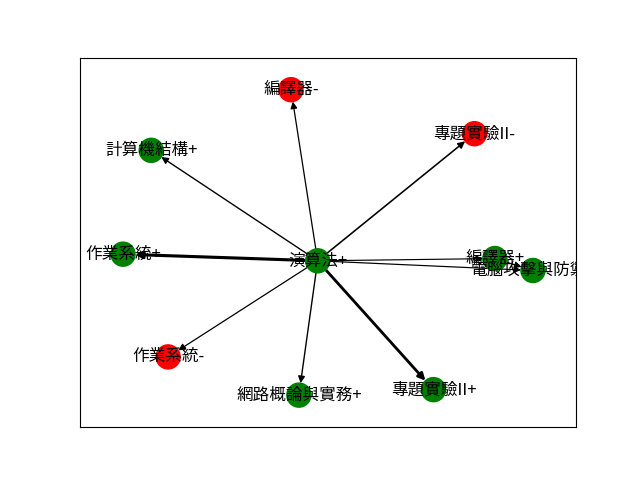
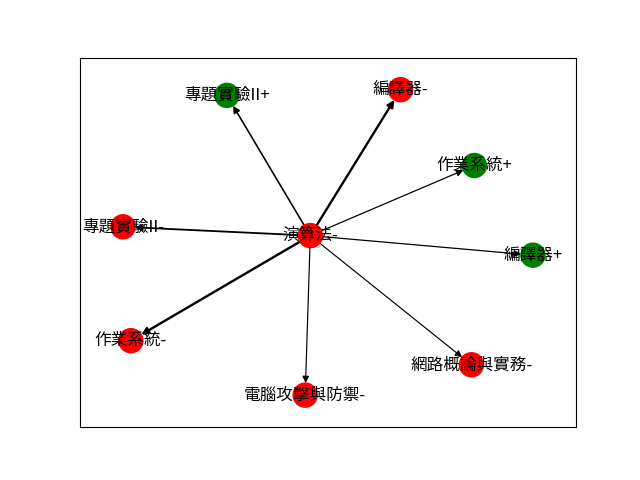


In [ ]:
!pip3 install networkx
!pip3 install matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
def produce_picture(course_name):
  D = filter_course(course_name)
  res = list()
  for i in D:
      x = eval(i)
      y = list()
      for j in range(1,len(x)):
          weight = math.log(D[i])/5 #因為線段太粗真的會很可怕，找到更好的縮小函式歡迎換掉
          if(weight < 0.5):
              y.append((x[j-1][0], x[j][0], 0.5))
          else:
              y.append((x[j-1][0], x[j][0], weight))
      if len(y) > 0:
          res.append(y)
  G = nx.DiGraph()
  for i in res:
    G.add_weighted_edges_from(i)
  values = list()
  for node in G.nodes():
    if node[-1]=='+':
      values.append('green')
    else:
      values.append('red')
  black_edges = [edge for edge in G.edges()]
  pos = nx.spring_layout(G)
  nx.draw_networkx_nodes(G, pos, node_color = values)
  nx.draw_networkx_labels(G, pos)
  nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=True, width=[float(v['weight']) for (r,c,v) in G.edges(data=True)])
  plt.savefig(course_name+'.png')
  plt.show()
  #plt.cla()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 31243 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 24335 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 35486 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 35328 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 31243 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 24335 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 35486 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

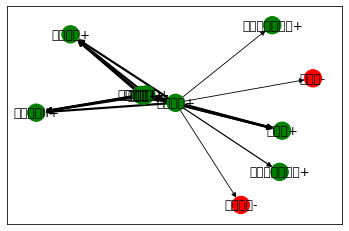

In [ ]:
produce_picture('程式語言+')

# 視覺化
1. 其實有點不知道Prefix Span裏面的結果代表什麽，可能要討論一下。
2. Entity-relationship diagram 不一定要用neo4，應該是可以用networkx和matplotlib來畫。(這邊是不確定啦）

In [ ]:
!pip3 install networkx
!pip3 install matplotlib

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

In [ ]:
graph = nx.DiGraph()

In [ ]:
oneSubject = []
oneSubject = pandasDF[0:16]
print(oneSubject)
l1 = oneSubject['sequence'].tolist()
l2 = oneSubject['freq'].tolist()
dictionary1 = dict(zip(l1, l2))
print(dictionary1)

             sequence  freq
0    [['組合語言與系統程式-']]   173
1       [['數位系統導論+']]   279
2       [['專題實驗II-']]   140
3         [['工程數學-']]   160
4      [['計算機概論 Ⅰ-']]   141
5   [['多媒體軟硬體整合設計+']]    69
6          [['編譯器-']]   262
7        [['電子電路學-']]    82
8       [['數位系統導論-']]   189
9         [['離散數學+']]   251
10        [['工程數學+']]   197
11      [['專題實驗II+']]   420
12   [['組合語言與系統程式+']]   290
13       [['計算機組織-']]   218
14        [['作業系統-']]   244
15         [['編譯器+']]   311
{"[['組合語言與系統程式-']]": 173, "[['數位系統導論+']]": 279, "[['專題實驗II-']]": 140, "[['工程數學-']]": 160, "[['計算機概論 Ⅰ-']]": 141, "[['多媒體軟硬體整合設計+']]": 69, "[['編譯器-']]": 262, "[['電子電路學-']]": 82, "[['數位系統導論-']]": 189, "[['離散數學+']]": 251, "[['工程數學+']]": 197, "[['專題實驗II+']]": 420, "[['組合語言與系統程式+']]": 290, "[['計算機組織-']]": 218, "[['作業系統-']]": 244, "[['編譯器+']]": 311}


In [ ]:
twoSubject = []
twoSubject = pandasDF[18:34]
print(twoSubject)

          sequence  freq
18      [['演算法+']]   382
19  [['電腦攻擊與防禦-']]   127
20   [['數位系統實驗+']]   255
21     [['程式語言+']]   246
22  [['計算機概論 Ⅰ+']]   202
23    [['計算機組織+']]   291
24   [['資訊工程概論-']]   149
25    [['機率與統計+']]   230
26  [['網路概論與實務+']]   129
27    [['計算機結構+']]   110
28   [['計算機實習Ⅰ-']]   151
29     [['資料結構+']]   250
30     [['線性代數+']]   263
31  [['計算機實習 Ⅱ+']]   206
32     [['線性代數-']]   196
33    [['電子電路學+']]   112


In [ ]:
l1 = twoSubject['sequence'].tolist()
l2 = twoSubject['freq'].tolist()
dictionary2 = dict(zip(l1, l2))
print(dictionary2)
#tuple2 = [(k, v) for k, v in dictionary2.items()]
#print(tuple2)

{"[['演算法+']]": 382, "[['電腦攻擊與防禦-']]": 127, "[['數位系統實驗+']]": 255, "[['程式語言+']]": 246, "[['計算機概論 Ⅰ+']]": 202, "[['計算機組織+']]": 291, "[['資訊工程概論-']]": 149, "[['機率與統計+']]": 230, "[['網路概論與實務+']]": 129, "[['計算機結構+']]": 110, "[['計算機實習Ⅰ-']]": 151, "[['資料結構+']]": 250, "[['線性代數+']]": 263, "[['計算機實習 Ⅱ+']]": 206, "[['線性代數-']]": 196, "[['電子電路學+']]": 112}


In [ ]:
# Glyph 32218 missing from current font. will be appeared when drawing labels
# https://knowlab.wordpress.com/2016/05/25/networkx-%E7%B9%AA%E5%9C%96%E9%A1%AF%E7%A4%BA%E4%B8%AD%E6%96%87%E7%9A%84%E8%A7%A3%E6%B1%BA%E6%96%B9%E6%B3%95/
#graph.add_nodes_from(dictionary1)
#print(graph.nodes)
tuple2 = [('計算機組織+', '組合語言與系統程式+'), ('計算機組織+', '演算法+')]
graph.add_edges_from(tuple2)
print(graph.edges)

[('計算機組織+', '組合語言與系統程式+'), ('計算機組織+', '演算法+')]


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 24373 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 19977 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 26446 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 22235 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 29579 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 20116 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 24373 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

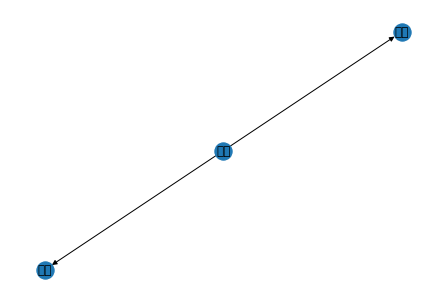

In [ ]:
# coding = utf-8
from pylab import *
import networkx as nx
g=nx.DiGraph()
g.add_edge('張三','李四')
g.add_edge('張三','王五')
nx.draw(g,with_labels=True)
plt.show()

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 35336 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 31639 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 27231 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 32068 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 32340 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 35336 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning:

Glyph 31639 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotli

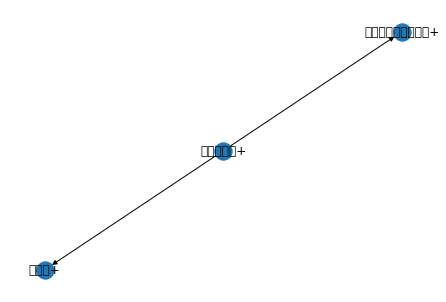

In [ ]:
nx.draw(graph, with_labels = True)

# 視覺化的另一條路
一次性顯示全部圖片看起來會非常亂
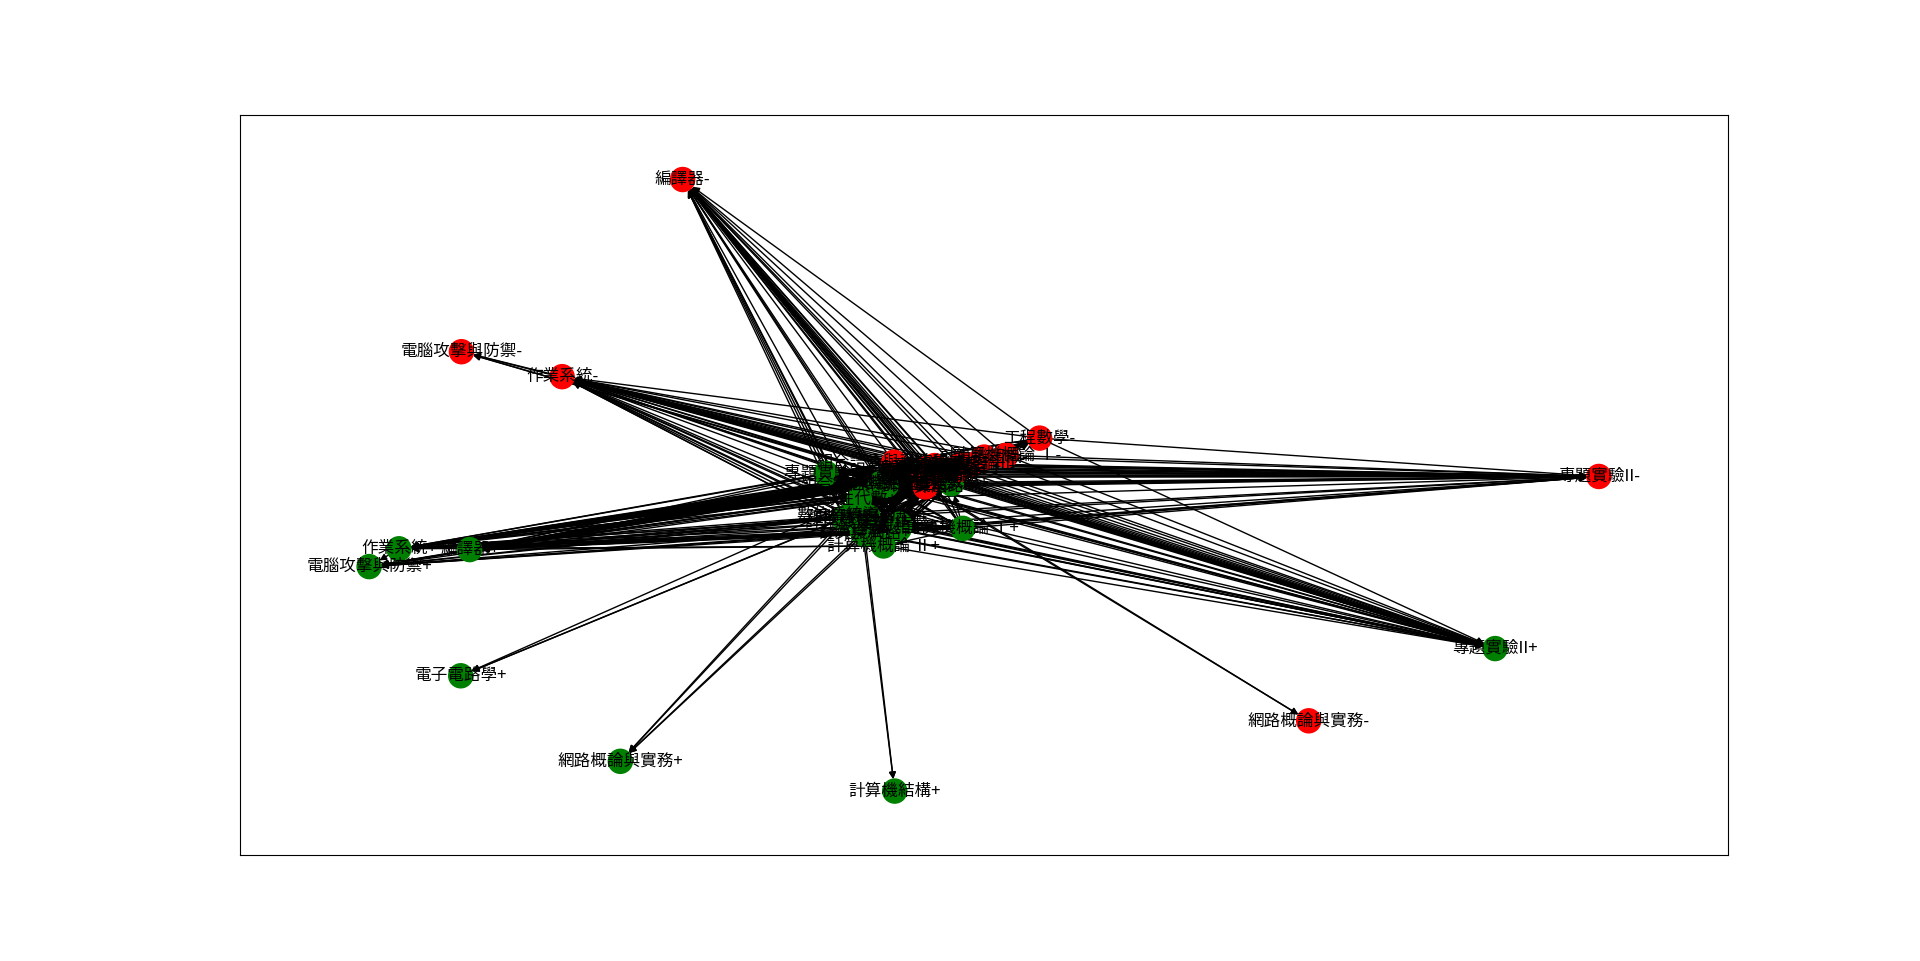

有在自己的電腦上跑成功了，這部分可以不用看，試驗比較成功的版本放在filter那邊了

In [ ]:
#把所有線段放入res
res = list()
for D in data:
  x=eval(D[0])
  tmp = list()
  for i in range(1,len(x)):
    for j in range(len(x[i-1])):
      for k in range(len(x[i])):
        tmp.append((x[i-1][j],x[i][k]))
  if len(tmp) > 0:
    res.append(tmp)
print(res)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



In [ ]:
# Colab 進行matplotlib繪圖時顯示繁體中文
# 下載台北思源黑體並命名taipei_sans_tc_beta.ttf，移至指定路徑
!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

import matplotlib as mpl
import matplotlib.pyplot as plt 
from matplotlib.font_manager import fontManager

# 改style要在改font之前
# plt.style.use('seaborn')  

fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
mpl.rc('font', family='Taipei Sans TC Beta')

--2021-12-27 03:01:11--  https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving drive.google.com (drive.google.com)... 142.250.128.102, 142.250.128.138, 142.250.128.113, ...
Connecting to drive.google.com (drive.google.com)|142.250.128.102|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ucush6kouqvuhdt4lqog1lltdaf48fc/1640574075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_ [following]
--2021-12-27 03:01:16--  https://doc-0k-9o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/3ucush6kouqvuhdt4lqog1lltdaf48fc/1640574075000/02847987870453524430/*/1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_
Resolving doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)... 108.177.111.132, 2607:f8b0:4001:c07::84
Connecting to doc-0k-9o-docs.googleusercontent.com (doc-0k-9o-docs.googleusercontent.com)|1

In [ ]:
!ls /usr/local/lib/python2.7/dist-packages/matplotlib/mpl-data/fonts/ttf
#!wget -O TaipeiSansTCBeta-Regular.ttf https://drive.google.com/uc?id=1eGAsTN1HBpJAkeVM57_C7ccp7hbgSz3_&export=download

cmb10.ttf			DejaVuSerif.ttf
cmex10.ttf			LICENSE_STIX
cmmi10.ttf			STIXGeneralBolIta.ttf
cmr10.ttf			STIXGeneralBol.ttf
cmss10.ttf			STIXGeneralItalic.ttf
cmsy10.ttf			STIXGeneral.ttf
cmtt10.ttf			STIXNonUniBolIta.ttf
DejaVuSans-BoldOblique.ttf	STIXNonUniBol.ttf
DejaVuSans-Bold.ttf		STIXNonUniIta.ttf
DejaVuSansDisplay.ttf		STIXNonUni.ttf
DejaVuSansMono-BoldOblique.ttf	STIXSizFiveSymReg.ttf
DejaVuSansMono-Bold.ttf		STIXSizFourSymBol.ttf
DejaVuSansMono-Oblique.ttf	STIXSizFourSymReg.ttf
DejaVuSansMono.ttf		STIXSizOneSymBol.ttf
DejaVuSans-Oblique.ttf		STIXSizOneSymReg.ttf
DejaVuSans.ttf			STIXSizThreeSymBol.ttf
DejaVuSerif-BoldItalic.ttf	STIXSizThreeSymReg.ttf
DejaVuSerif-Bold.ttf		STIXSizTwoSymBol.ttf
DejaVuSerifDisplay.ttf		STIXSizTwoSymReg.ttf
DejaVuSerif-Italic.ttf


In [ ]:
dd=list()
for a in data:
  dd.append([a[0],a[1]])
print(len(dd))
print(dd)

23679
[["[['組合語言與系統程式-']]", 173], ["[['數位系統導論+']]", 279], ["[['專題實驗II-']]", 140], ["[['工程數學-']]", 160], ["[['計算機概論 Ⅰ-']]", 141], ["[['多媒體軟硬體整合設計+']]", 69], ["[['編譯器-']]", 262], ["[['電子電路學-']]", 82], ["[['數位系統導論-']]", 189], ["[['離散數學+']]", 251], ["[['工程數學+']]", 197], ["[['專題實驗II+']]", 420], ["[['組合語言與系統程式+']]", 290], ["[['計算機組織-']]", 218], ["[['作業系統-']]", 244], ["[['編譯器+']]", 311], ["[['數位系統實驗-']]", 177], ["[['作業系統+']]", 335], ["[['演算法+']]", 382], ["[['電腦攻擊與防禦-']]", 127], ["[['數位系統實驗+']]", 255], ["[['程式語言+']]", 246], ["[['計算機概論 Ⅰ+']]", 202], ["[['計算機組織+']]", 291], ["[['資訊工程概論-']]", 149], ["[['機率與統計+']]", 230], ["[['網路概論與實務+']]", 129], ["[['計算機結構+']]", 110], ["[['計算機實習Ⅰ-']]", 151], ["[['資料結構+']]", 250], ["[['線性代數+']]", 263], ["[['計算機實習 Ⅱ+']]", 206], ["[['線性代數-']]", 196], ["[['電子電路學+']]", 112], ["[['計算機概論 Ⅱ+']]", 187], ["[['虛擬實境+']]", 68], ["[['演算法-']]", 270], ["[['Linux作業系統+']]", 66], ["[['計算機概論 Ⅱ-']]", 162], ["[['計算機網路+']]", 300], ["[['資訊工程概論+']]", 299], ["[['程式語言-']]", 221], ["[['計算機實習

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif']=['seaborn'] #用来正常显示中文标签
plt.rcParams['axes.unicode_minus']=False #用来正常显示负号

findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 28436 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 31639 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 27861 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 23560 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 38988 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 23526 missing from current font.

/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning:

Glyph 39511

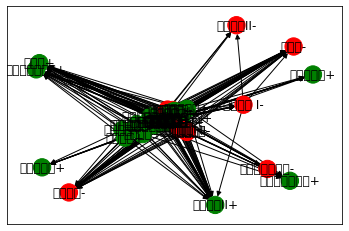

<Figure size 12288x8192 with 0 Axes>

<Figure size 432x576 with 0 Axes>

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt
#plt.style.use('seaborn')
#fontManager.addfont('TaipeiSansTCBeta-Regular.ttf')
#mpl.rc('font', family='Taipei Sans TC Beta')
G = nx.DiGraph()
for i in res:
  G.add_edges_from(i)
values = list()
for node in G.nodes():
  if node[-1]=='+':
    values.append('green')
  else:
    values.append('red')
black_edges = [edge for edge in G.edges()]
pos = nx.spring_layout(G)
nx.draw_networkx_nodes(G, pos, cmap=plt.get_cmap('jet'), node_color = values)
nx.draw_networkx_labels(G, pos)
nx.draw_networkx_edges(G, pos, edgelist=black_edges, arrows=True) 
plt.figure(dpi=2048)
plt.figure(figsize=(6, 8))
plt.show()

## Spark test